# BOSTON HOUSE PRICE PREDICTION USING LINEAR REGRESSION

### Importing Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Reading and Understanding the Dataset

In [4]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
# Without Column names
# data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+") # names=column_names
# With Column names
data = pd.read_csv('housing.csv', header=None, delimiter=r"\s+", names=column_names)
pd.set_option('display.width', 1000)  # Increase the display width

print("Top 5 rows:")
print(data.head())
print()

print("Dataset Columns: \n", data.columns)
print()

print("Dataset Shape: ", data.shape)


Top 5 rows:
      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO       B  LSTAT  MEDV
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0     15.3  396.90   4.98  24.0
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0     17.8  396.90   9.14  21.6
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0     17.8  392.83   4.03  34.7
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0     18.7  394.63   2.94  33.4
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0     18.7  396.90   5.33  36.2

Dataset Columns: 
 Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'], dtype='object')

Dataset Shape:  (506, 14)


## Understanding Dataset using Plots

### Importing Libraries

In [5]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

### Distribution of House Prices using Histogram

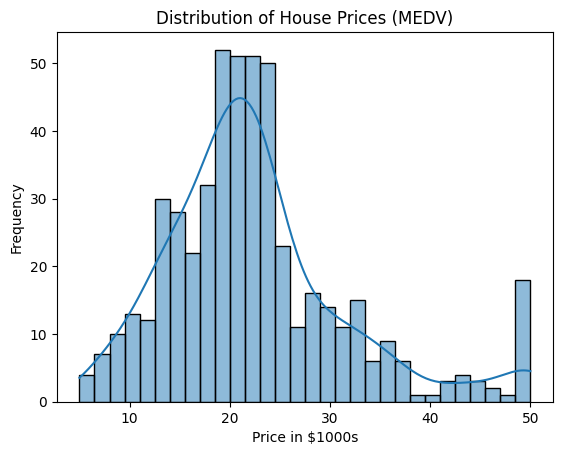

In [6]:
sns.histplot(data['MEDV'], bins=30, kde=True)
plt.title('Distribution of House Prices (MEDV)')
plt.xlabel('Price in $1000s')
plt.ylabel('Frequency')
plt.show() 

- House price data is right-skewed: meaning most houses are moderately priced, and fewer houses are extremely expensive.
- The distribution has a long tail on the right, it indicates the presence of expensive properties.
- The distribution is close to a normal (bell-shaped) curve, it indicates that the target variable (MEDV) follows a Gaussian distribution, hence suitable for linear regression models.

### Correlation Heatmap

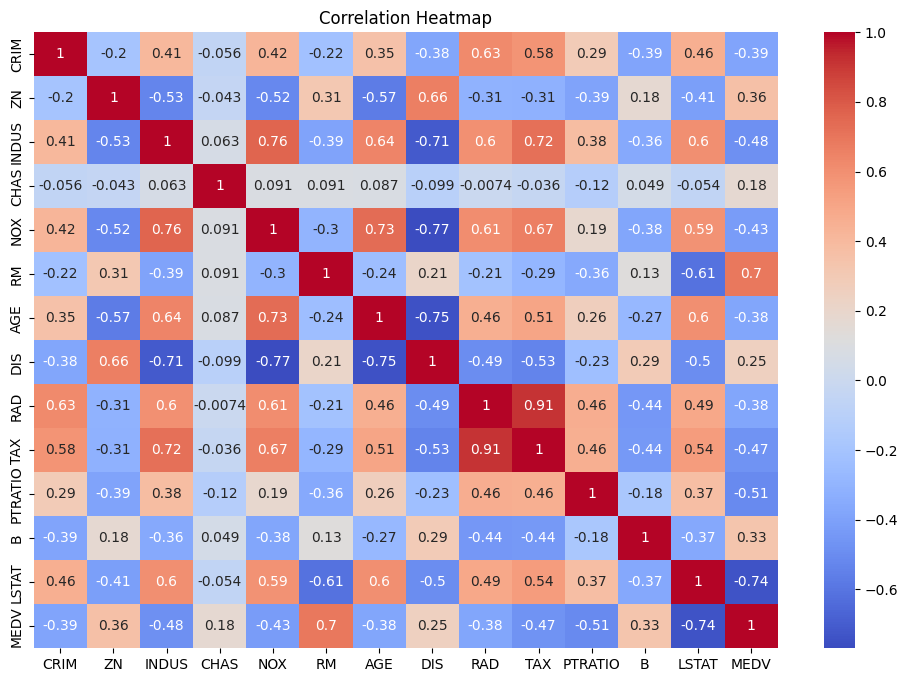

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Highly correlated variables with target value (MEDV):
- RM and MEDV (0.7)
- LSTAT and MEDV (-0.74)

### Relationship between RM/LSTAT and MEDV

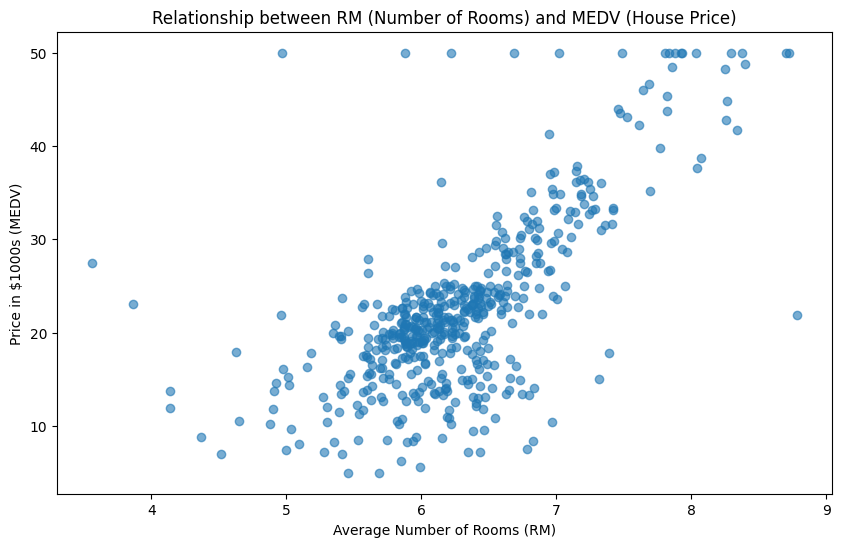

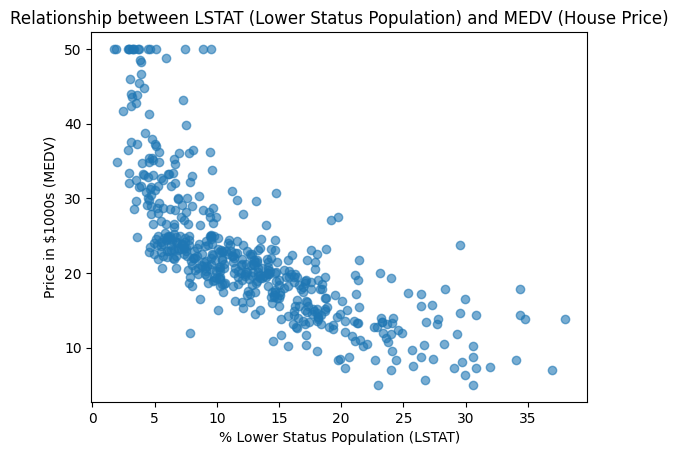

In [8]:
plt.figure(figsize=(10, 6))
plt.scatter(data['RM'], data['MEDV'], alpha=0.6)
plt.title('Relationship between RM (Number of Rooms) and MEDV (House Price)')
plt.xlabel('Average Number of Rooms (RM)')
plt.ylabel('Price in $1000s (MEDV)')
plt.show()

plt.scatter(data['LSTAT'], data['MEDV'], alpha=0.6)
plt.title('Relationship between LSTAT (Lower Status Population) and MEDV (House Price)')
plt.xlabel('% Lower Status Population (LSTAT)')
plt.ylabel('Price in $1000s (MEDV)')
plt.show()

- RM (average number of rooms per dwelling) has a positive correlation with house prices. This means houses with more rooms tend to be priced higher.
- For LSTAT (percentage of lower-status population), there is a negative correlation, indicating that as LSTAT increases, house prices tend to decrease.

## Using Linear Regression to Predict House Prices

In [9]:
from sklearn import datasets, linear_model, metrics
from sklearn.preprocessing import StandardScaler

In [10]:
X = data.iloc[:, :12]
y = data.iloc[:, 13]

# Training Data
X_train = X.iloc[0:400, :]
y_train = y.iloc[0:400]

# Test Data
X_test = X.iloc[400: 506, :]
y_test = y.iloc[400: 506]

# Preprocessing the Data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

reg = linear_model.SGDRegressor(max_iter=1000, learning_rate='constant', eta0=0.01)
reg.fit(X_train, y_train)
predictions_train = reg.predict(X_train)
predictions_test = reg.predict(X_test)

print("================================ PREDICTIONS ============================")
print(predictions_test)
print("=========================================================================")

print("MAE Train = {0}", format(metrics.mean_absolute_error(y_train, predictions_train)))
print("MAE Test = {0}", format(metrics.mean_absolute_error(y_test, predictions_test)))
print("MSE Train = {0}", format(metrics.mean_squared_error(y_train, predictions_train)))
print("MSE Test = {0}", format(metrics.mean_squared_error(y_test, predictions_test)))

================================ PREDICTIONS ============================
[  7.21892321  15.20349318  18.0174883    2.35079508  -2.91573423
 -15.31655535  -3.70508398  12.26954995  15.84690318  23.42217566
  -0.89641912  23.42098688   5.22260753   2.80395904 -11.24621197
  17.6808434   24.38914874   4.81886735 -12.41599713  23.87463433
  17.10335554  16.04848328  13.54299382  22.3954327   18.57103155
  14.82107743  19.45060748   7.54317069  21.10487473  21.12577659
  23.36687926  26.01722765  25.13245127  22.1411509   16.1592666
  20.2815631   18.44911053  15.64717261  14.76149746  10.85931958
   6.36717452  16.43588269  16.76060897  16.92180702  12.330472
  20.02055463  18.26915128  14.94116309  15.00223673  18.73149589
  24.81849716  20.86203431  18.20163171  24.9317566   22.94630841
  23.62582008  19.48646454  17.63561198  17.88837831  15.43399845
  22.56698116  19.31245745  17.40124353  18.95538345  17.70662697
  17.68695949  20.57161422  19.07587379  13.44531769  13.47264485
  19.

## Linear Regression from Scratch (Using Normal Eqn)

### Importing Libraries

In [11]:
import numpy as np
from sklearn import datasets, metrics
from sklearn.preprocessing import StandardScaler
import pandas as pd

### Splitting Data into Training and Testing Data

In [11]:
X=data.iloc[:,:12]
y=data.iloc[:,13]

X_train_temp1 = X.iloc[0:400,:]
X_train = np.zeros((X_train_temp1.shape[0],X_train_temp1.shape[1]+1))
X_train[:,0] = np.ones((X_train_temp1.shape[0]))
X_train[:,1:] = X_train_temp1
y_train = y.iloc[0:400]
print("Type of X_train:", type(X_train), "Shape of X_train:", X_train.shape)


X_test_temp1 = X.iloc[400:506,:]
X_test = np.zeros((X_test_temp1.shape[0],X_test_temp1.shape[1]+1))
X_test[:,0] = np.ones((X_test_temp1.shape[0]))
X_test[:,1:] = X_test_temp1
y_test = y.iloc[400:506]
print("Type of X_test:", type(X_test), "Shape of X_test:", X_test.shape)


scaler = StandardScaler()
scaler.fit(X_train[:,1:])
X_train[:,1:] = scaler.transform(X_train[:,1:])
X_test[:,1:] = scaler.transform(X_test[:,1:])

Type of X_train: <class 'numpy.ndarray'> Shape of X_train: (400, 13)
Type of X_test: <class 'numpy.ndarray'> Shape of X_test: (106, 13)


### Without Regularization

In [12]:
theta = np.random.uniform(0,1,size=(X_train.shape[1]))
niterations = 1000
alphas = [0.01, 0.05, 0.001, 0.003, 0.07]
alpha = 0.05
multi_costs = []
index = 0
m = X_train.shape[0]
n = X_train.shape[1]

# costs = []
# for i in range(niterations):
#     update=np.zeros(X_train.shape[1])
#     ypred=np.dot(X_train,theta)
#     error=ypred - y_train
#     for j in range(n):
#         update[j]=np.sum(error*(X_train.T)[j])
#     theta = theta - (1/m)*(alpha)*(update)
#     cost = (1 / (2 * m)) * np.sum(np.square(error))
#     costs.append(cost)

# Loop over each alpha
for alpha in alphas:
    # Reset theta for each alpha (if you want to start with the same initial theta)
    theta = np.random.uniform(0, 1, size=(X_train.shape[1]))  # Reinitialize theta
    costs = []  # Store the cost for this alpha

    for i in range(niterations):
        update = np.zeros(X_train.shape[1])
        ypred = np.dot(X_train, theta)  # Prediction
        error = ypred - y_train  # Error
        
        # Update theta for all features
        for j in range(n):
            update[j] = np.sum(error * (X_train.T)[j])  # Update for each feature
        
        theta = theta - (1 / m) * alpha * update  # Apply the update rule
        
        # Compute cost (mean squared error)
        cost = (1 / (2 * m)) * np.sum(np.square(error))
        costs.append(cost)
    
    # Store the cost relationship between the predictor and the target variable is not linear, and a non-linear model might better fithistory for this alpha in multi_costs
    multi_costs.append(costs)

print("Theta:",theta)
# print("Cost:", cost)
print("Update:", update)
print("Theta Shape:", theta.shape)
predictions=np.dot(X_test, theta)
print(predictions)
print("MAE:", metrics.mean_absolute_error(y_true=y_test,y_pred=predictions))
print("MSE:", metrics.mean_squared_error(y_true=y_test,y_pred=predictions))

Theta: [-1.82306238  0.94610532  0.01603732  0.56228275 -2.06161157  5.34824767
 -1.24988581 -3.00768817  3.14691481 -1.74199883 -1.89497195 -0.23472094]
Update: [ 0.00910807 -0.00978339 -0.03065751  0.00702493  0.00860901  0.00311548
 -0.00662026 -0.00723035 -0.08455179  0.08656314  0.00616135  0.00560152]
Theta Shape: (12,)
[ -8.81041105  -2.8964917   -1.00635142 -13.37731589 -16.16927909
 -23.80437129 -19.64706092  -6.17428071  -3.64198445   3.90288411
 -14.18248129   3.34553972 -12.91450057 -13.17062492 -24.14833711
  -1.37739339   3.82367817 -11.8682167  -21.65547911   3.62269423
  -1.83586357  -3.37852506  -5.2483085    1.27555869  -2.07663174
  -4.41788691  -0.70433198  -8.10952576   0.53539094   0.70656393
   2.61446125   5.28471437   4.000548     1.26841684  -3.11526464
   0.40625485  -1.11314051  -3.66095598  -4.48032392  -7.56956889
 -10.00659536  -2.40791544  -2.62938028  -1.91061981  -6.27468826
  -0.11921527  -1.41740464  -3.77304843  -3.8109138   -0.90948136
   3.5694382

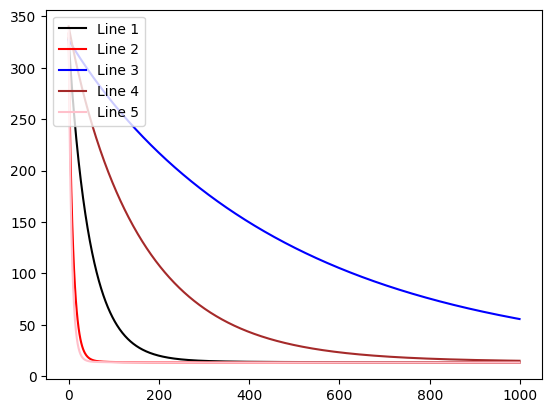

In [13]:
fig, ax = plt.subplots()
ax.plot(range(1000), multi_costs[0], color = 'black', label = 'Line 1')
ax.plot(range(1000), multi_costs[1], color = 'red', label = 'Line 2')
ax.plot(range(1000), multi_costs[2], color = 'blue', label = 'Line 3')
ax.plot(range(1000), multi_costs[3], color = 'brown', label = 'Line 4')
ax.plot(range(1000), multi_costs[4], color = 'pink', label = 'Line 5')
ax.legend(loc = 'upper left')
plt.show()

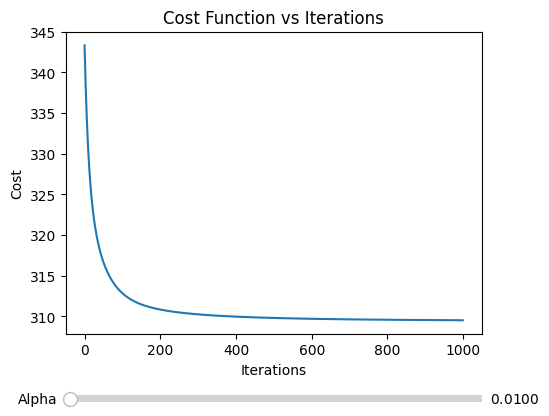

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from sklearn.preprocessing import StandardScaler

# Assume X_train and y_train are defined

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize parameters
niterations = 1000
m = X_train_scaled.shape[0]
n = X_train_scaled.shape[1]
theta = np.random.uniform(0, 1, size=(X_train_scaled.shape[1]))

# Function to perform gradient descent for a given alpha
def gradient_descent(alpha):
    theta = np.random.uniform(0, 1, size=(X_train_scaled.shape[1]))
    costs = []
    
    for i in range(niterations):
        update = np.zeros(X_train_scaled.shape[1])
        ypred = np.dot(X_train_scaled, theta)
        error = ypred - y_train
        
        for j in range(n):
            update[j] = np.sum(error * X_train_scaled[:, j])
            
        theta = theta - (1 / m) * alpha * update
        cost = (1 / (2 * m)) * np.sum(np.square(error))
        costs.append(cost)
    
    return costs

# Set up the figure and axis for plotting
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
ax.set_title("Cost Function vs Iterations")

# Initial alpha value
alpha_init = 0.01
costs = gradient_descent(alpha_init)

# Plot initial cost values
line, = ax.plot(range(niterations), costs, label=f"Alpha: {alpha_init}")
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

# Slider for changing alpha
ax_alpha = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor='lightgoldenrodyellow')
alpha_slider = Slider(ax_alpha, 'Alpha', 0.0001, 1.0, valinit=alpha_init, valstep=0.0001)

# Update function for slider
def update(val):
    alpha = alpha_slider.val
    new_costs = gradient_descent(alpha)
    line.set_ydata(new_costs)  # Update the plot
    line.set_label(f"Alpha: {alpha}")
    ax.legend()
    fig.canvas.draw_idle()  # Redraw the plot

# Connect the update function to the slider
alpha_slider.on_changed(update)

plt.show()


In [1]:
import ipywidgets as widgets
widgets.IntSlider()

IntSlider(value=0)